Computer: lookfar.dynamic.ucsd.edu


(<matplotlib.collections.PathCollection at 0x11c676250>,
 <matplotlib.axes._axes.Axes at 0x11c2a5550>)

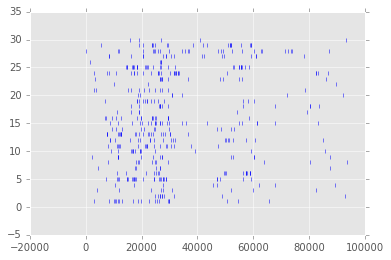

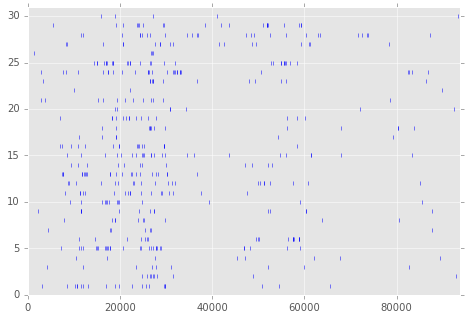

In [6]:
#read a wav file, try to filter it, show spectrogram, find finch-like song
%matplotlib inline
import h5py

import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os
import wave
import struct

matplotlib.style.use('ggplot')

comp_name=socket.gethostname()
print 'Computer: ' + comp_name
if  comp_name == 'chim':
    #sys.path.append('/Users/zeke/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join(os.path.abspath('W:') , "earneodo", "bci_zf")
if  'lookfar' in comp_name:
    sys.path.append('/Users/zeke/repos/ephysflow/basic_viewing')
    sys.path.append('/Users/zeke/repos/soundflow/sound_tools')
    experiment_folder = os.path.join(os.path.abspath('/Volumes') , 'gentner', 'earneodo', 'bci_zf')
    
raw_data_folder = os.path.join(experiment_folder, 'raw_data')
ss_data_folder = os.path.join(experiment_folder, 'ss_data')
    

#file structure
bird_id = 'z003'
sess = 1
rec = 'a'
run = 1
sess_name = 'Pen03_Lft_AP500_ML500__Site01_Z2000__z003_cat_P03_S01_1_02'

raw_file_folder = os.path.join(raw_data_folder, bird_id, str(sess).zfill(3))
raw_file_name = rec + '_' + str(run).zfill(2) + '_song.wav'
raw_file_path = os.path.join(raw_file_folder, raw_file_name)
ss_file_folder = raw_file_folder = os.path.join(ss_data_folder, bird_id, 'post_man_sort', sess_name)

from events import Event, Sound
# open the kwik file for playing
kwik_files = [f for f in os.listdir(ss_file_folder) if f.endswith('.kwik')]
kwik_file = kwik_files[0]

f = h5py.File(os.path.join(ss_file_folder, kwik_file), 'r')
f['/event_types/Stimulus'].keys()
stim = Sound('sound_001_40000', h5=f)

stim.get_col('name')

from units import Unit
unit = Unit(22, h5=f)
unit.get_time_stamps()
unit.get_sampling_frequency()
rs = unit.get_raster(stim.get_col('start'), 3000, span_is_ms=True)

import basic_plot as bp
b = np.outer((np.arange(rs.shape[0]) + 1), np.ones(rs.shape[1]))
plt.scatter(rs, b, marker='|')

bp.plot_raster(bp.sparse_raster(rs))

In [5]:
#see the bout
raw_file_folder = os.path.join(raw_data_folder, bird_id, str(sess).zfill(3))
raw_file_name = rec + '_' + str(run).zfill(2) + '_song.wav'

array([[  3031.,   8454.,  10285., ...,     nan,     nan,     nan],
       [ 24793.,  25806.,  26584., ...,     nan,     nan,     nan],
       [  4175.,  11874.,  23401., ...,     nan,     nan,     nan],
       ..., 
       [    47.,  11546.,  11954., ...,     nan,     nan,     nan],
       [  5508.,  19135.,  20542., ...,     nan,     nan,     nan],
       [ 15791.,  18947.,  27057., ...,     nan,     nan,     nan]])

In [ ]:
a = np.ones(rs.shape)
b = np.outer((np.arange(rs.shape[0]) + 1), np.ones(rs.shape[1]))
plt.scatter(rs, b, marker='|')

In [ ]:
row = rs[1, :]
row_raster = np.empty_like(row)
row_raster[:] = np.nan
row[not row[:]==np.nan]

In [ ]:
row_goes = np.array((row[~np.isnan(row)]), dtype=np.int)
print row_goes
row_raster[row_goes]=1


In [ ]:
import basic_plot as bp
#grab a raster in format row=timestamps, col=trials
#and turn it into a matrix n_trials x t_samples with a one wherever there is a spike
def sparse_raster(x):
    n_t = x.shape[0] #n of trials
    n_s = x.shape[1] #n of samples
    raster = np.empty_like(x)
    raster[:] = np.nan
    
    for trial in np.arange(n_t):
        r = x[trial, :]
        raster[trial, np.array(r[~np.isnan(r)], dtype=np.int)] = 1
    return raster

y = plottable_raster(rs)
bp.plot_raster(y)

In [ ]:
np.where(~np.isnan(y))

In [ ]:
rs